In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import mark_inset

SMALL_SIZE = 14
LARGE_SIZE = 20

plt.rc('font', size=LARGE_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=LARGE_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

In [2]:
unet_results = pd.read_csv('./experiment_results/unet_results.csv', index_col=0, skipinitialspace=True)
fcn_results = pd.read_csv('./experiment_results/fcn_results.csv', index_col=0, skipinitialspace=True)
segnet_results = pd.read_csv('./experiment_results/segnet_results.csv', index_col=0, skipinitialspace=True)
deeplab_results = pd.read_csv('./experiment_results/deeplab_results.csv', index_col=0, skipinitialspace=True)

In [3]:
def plot_results(results, figure_title='', save_as=None):
    fig, ax = plt.subplots(figsize=(12, 18))
    
    labels = results.index.values
    classes = results.columns.values
    bar_width = 0.15
    bar_loc = np.arange(len(classes))
    offset = np.floor(bar_width*len(labels)/2*10)/10
    
    for i in range(5):
        ax.barh(bar_loc + i*bar_width - offset, results.to_numpy()[i], bar_width, label=labels[i])
    
    ax.set_title(figure_title)
    ax.set_xlabel('IoU')
    ax.set_xlim(0, 0.7)
    ax.set_ylabel('Class')
    ax.set_yticks(bar_loc)
    ax.set_yticklabels(classes)
    ax.invert_yaxis()
    ax.legend()
    
    ax.set_axisbelow(True)
    ax.xaxis.grid(color='gray')
    
    axins = ax.inset_axes([0.65, 0.08, 0.3, 0.3])
    
    for i in range(5):
        axins.barh(np.array([8,9]) + i*bar_width - offset, results.to_numpy()[i,8:10], bar_width, label=labels[i])
    
    axins.set_xlim(0, 0.01)
    axins.tick_params(axis='x', labelrotation=45)
    axins.set_ylim(8-offset*1.6,10-offset*1.6)
    axins.set_yticks([8,9])
    axins.set_yticklabels(classes[8:10])
    axins.invert_yaxis()
    
    axins.set_axisbelow(True)
    axins.xaxis.grid(color='gray')
    
    patch, pp1,pp2 = mark_inset(ax, axins, loc1=1, loc2=1, fc="none", lw=0.8, ec='gray')
    pp1.loc1 = 2
    pp1.loc2 = 3
    pp2.loc1 = 3
    pp2.loc2 = 2
    
    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
    
    plt.show()

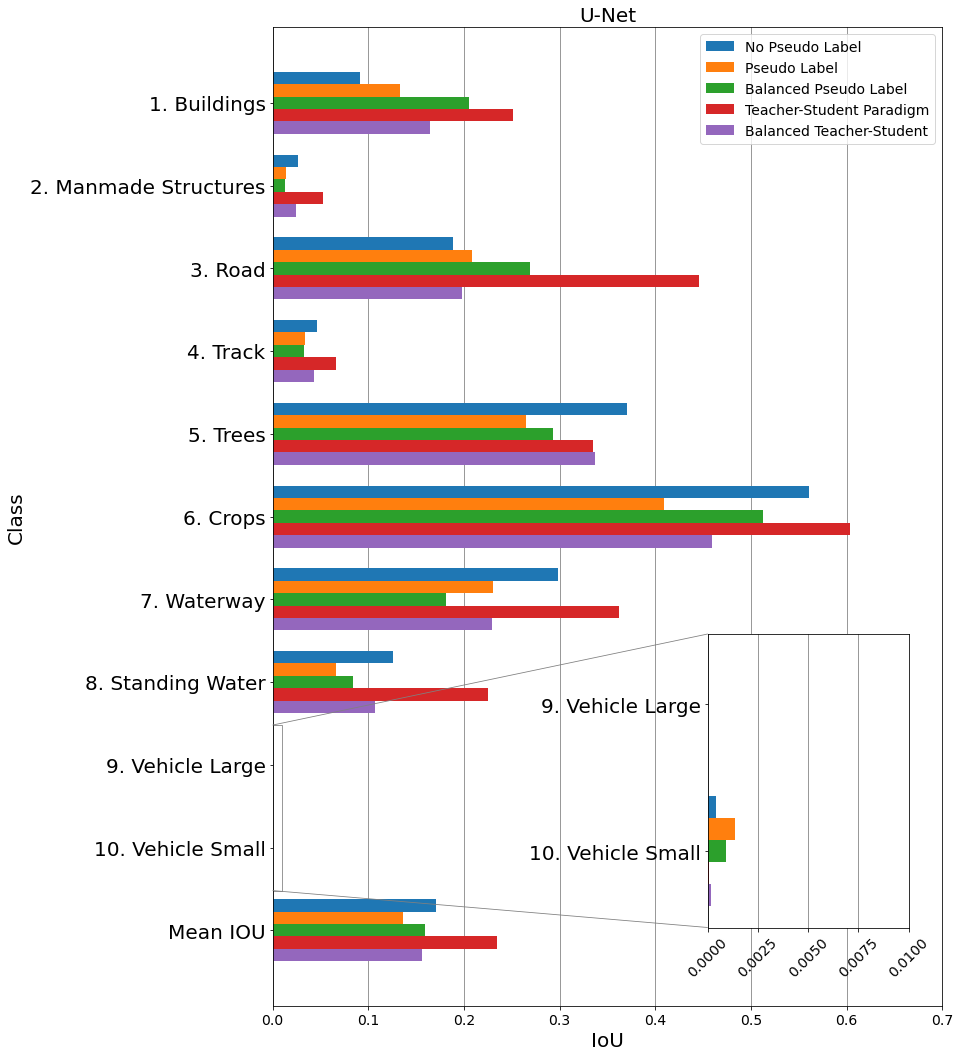

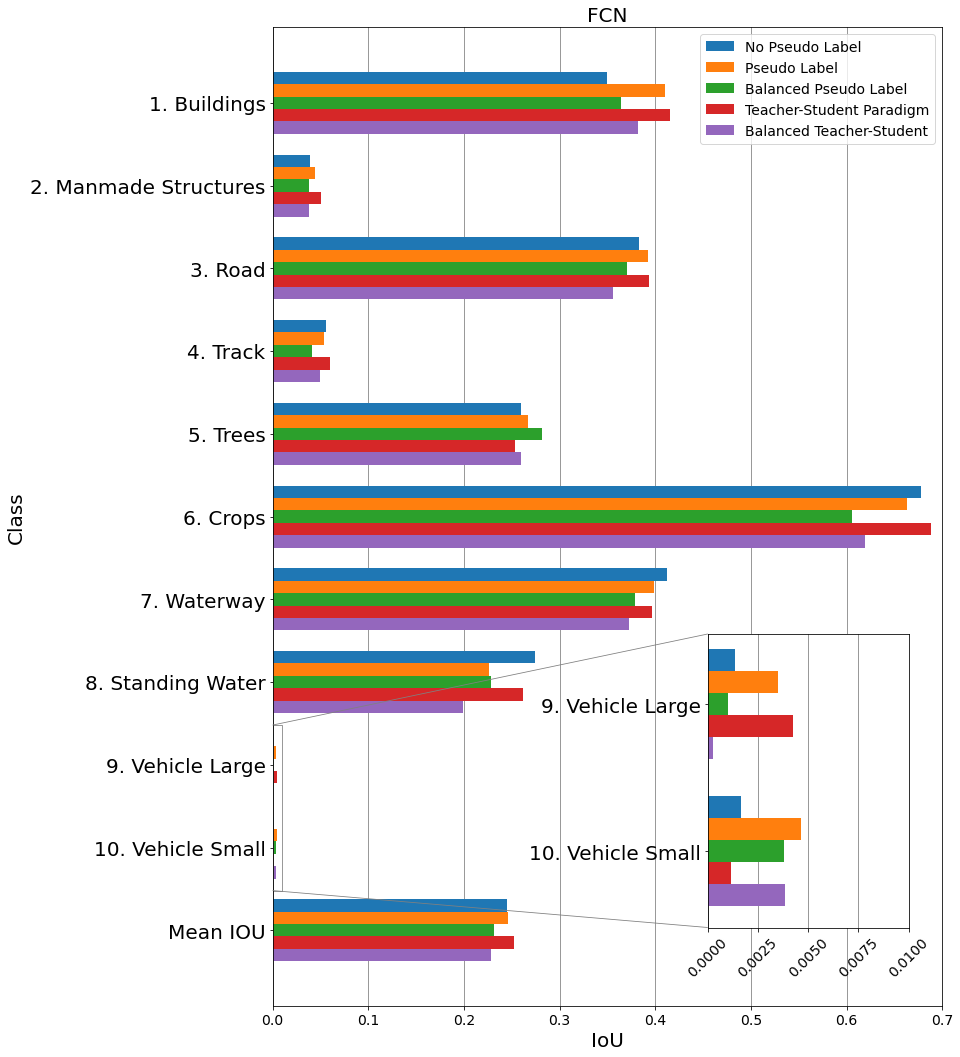

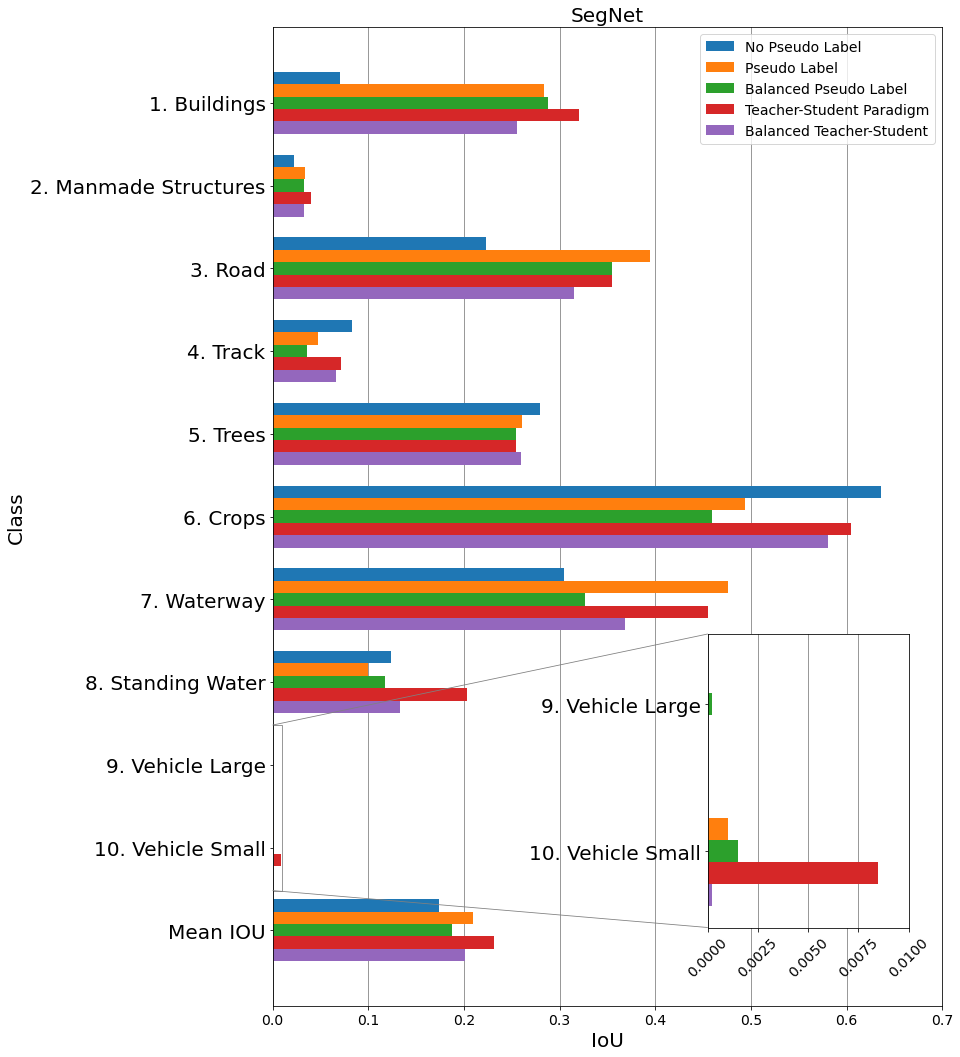

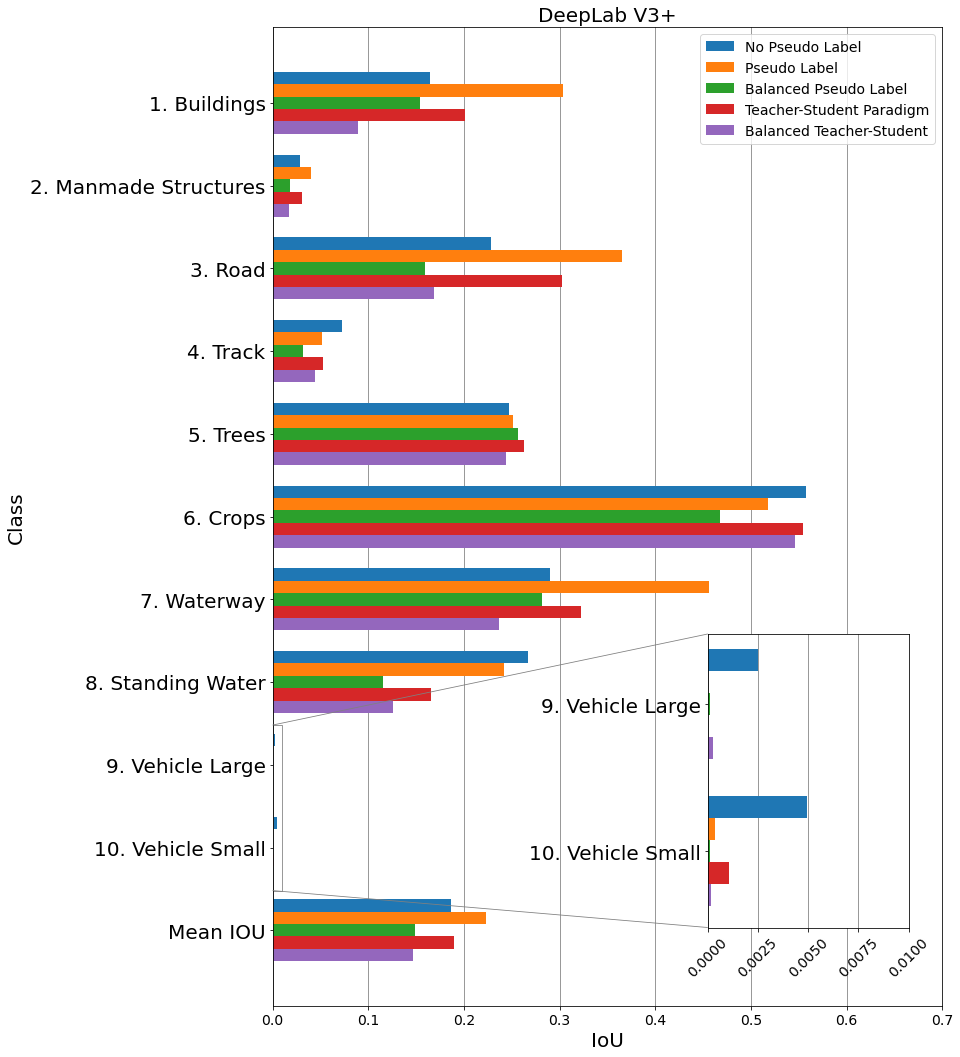

In [4]:
plot_results(unet_results, 'U-Net', 'result_unet')
plot_results(fcn_results, 'FCN', 'result_fcn')
plot_results(segnet_results, 'SegNet', 'result_segnet')
plot_results(deeplab_results, 'DeepLab V3+', 'result_deeplab')

In [5]:
pseudo_label_methods = list(unet_results.index)
model_names = ['U-Net', 'FCN', 'SegNet', 'Deeplab V3+']

mean_iou_results = pd.DataFrame(index=pseudo_label_methods, columns=model_names)

mean_iou_results['U-Net'] = unet_results['Mean IOU']
mean_iou_results['FCN'] = fcn_results['Mean IOU']
mean_iou_results['SegNet'] = segnet_results['Mean IOU']
mean_iou_results['Deeplab V3+'] = deeplab_results['Mean IOU']

mean_iou_results

,U-Net,FCN,SegNet,Deeplab V3+
No Pseudo Label,0.170901,0.245478,0.174380,0.186347
Pseudo Label,0.136129,0.246381,0.209108,0.222829
Balanced Pseudo Label,0.159165,0.231278,0.187153,0.148434
Teacher-Student Paradigm,0.234180,0.252352,0.231456,0.189402
Balanced Teacher-Student,0.156390,0.227936,0.201222,0.147262


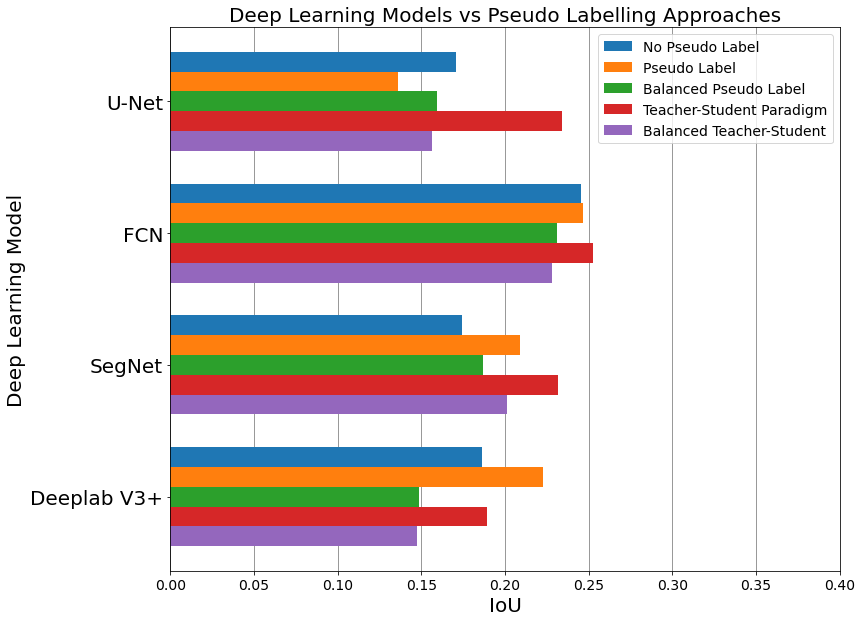

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
    
labels = pseudo_label_methods
classes = model_names
bar_width = 0.15
bar_loc = np.arange(len(classes))
offset = np.floor(bar_width*len(labels)/2*10)/10

for i in range(len(labels)):
    ax.barh(bar_loc + i*bar_width - offset, mean_iou_results.to_numpy()[i], bar_width, label=labels[i])

plt.gca().invert_yaxis()

ax.set_title('Deep Learning Models vs Pseudo Labelling Approaches')
ax.set_xlabel('IoU')
ax.set_xlim(0, 0.4)
ax.set_ylabel('Deep Learning Model')
ax.set_yticks(bar_loc)
ax.set_yticklabels(classes)
ax.legend()

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray')

plt.savefig('dl_vs_pl', bbox_inches='tight')

plt.show()

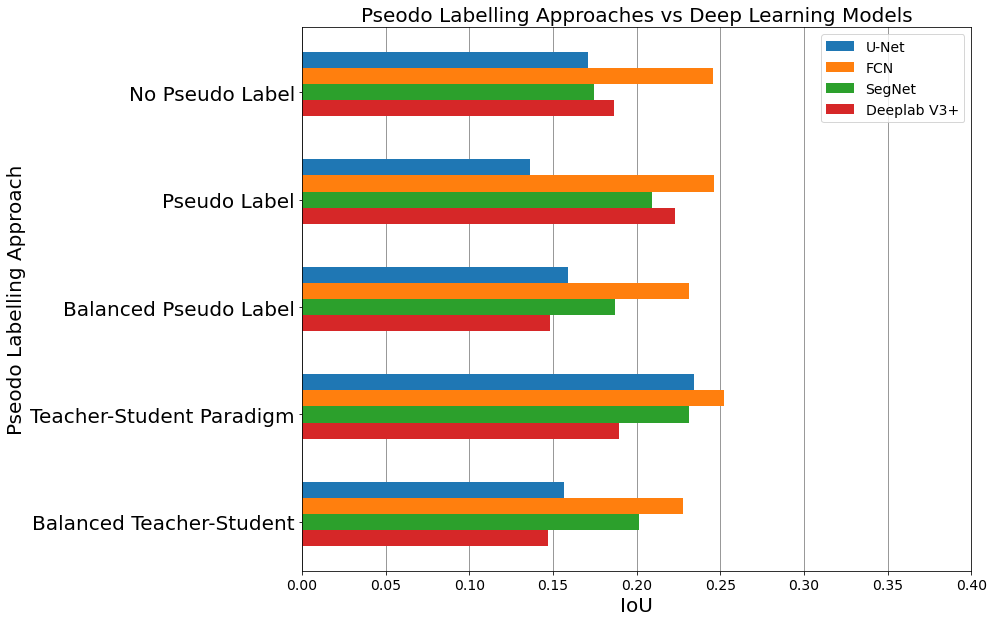

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
    
labels = model_names
classes = pseudo_label_methods
bar_width = 0.15
bar_loc = np.arange(len(classes))
offset = np.floor(bar_width*len(labels)/2*10)/10

for i in range(len(labels)):
    ax.barh(bar_loc + i*bar_width - offset, mean_iou_results.to_numpy()[:,i], bar_width, label=labels[i])

plt.gca().invert_yaxis()

ax.set_title('Pseodo Labelling Approaches vs Deep Learning Models')
ax.set_xlabel('IoU')
ax.set_xlim(0, 0.4)
ax.set_ylabel('Pseodo Labelling Approach')
ax.set_yticks(bar_loc)
ax.set_yticklabels(classes)
ax.legend()

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray')

plt.savefig('pl_vs_dl', bbox_inches='tight')

plt.show()